In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [2]:
file_path = "D:\\DEBADES SIR;S PAPERS\\Slowly rotating neutron star\\SLy.txt"

In [3]:
sly=np.genfromtxt(file_path,delimiter='')

In [9]:
print(sly)

[[6.000e+00 2.720e-14 4.510e+01 1.700e+14]
 [7.000e+00 1.270e-13 2.120e+02 5.820e+15]
 [8.000e+00 6.930e-13 1.150e+03 1.900e+17]
 [1.000e+00 6.295e-12 1.044e+04 9.744e+18]
 [2.000e+00 1.581e-11 2.622e+04 4.968e+19]
 [3.000e+00 3.972e-11 6.587e+04 2.431e+20]
 [4.000e+00 9.976e-11 1.654e+05 1.151e+21]
 [5.000e+00 2.506e-10 4.156e+05 5.266e+21]
 [6.000e+00 6.294e-10 1.044e+06 2.318e+22]
 [7.000e+00 1.581e-09 2.622e+06 9.755e+22]
 [8.000e+00 3.972e-09 6.588e+06 3.911e+23]
 [9.000e+00 5.000e-09 8.293e+06 5.259e+23]
 [1.000e+01 9.976e-09 1.655e+07 1.435e+24]
 [1.100e+01 1.990e-08 3.302e+07 3.833e+24]
 [1.000e+00 3.973e-08 6.592e+07 1.006e+25]
 [2.000e+00 7.926e-08 1.315e+08 2.604e+25]
 [3.000e+00 1.581e-07 2.625e+08 6.676e+25]
 [4.000e+00 1.991e-07 3.305e+08 8.738e+25]
 [5.000e+00 3.156e-07 5.239e+08 1.629e+26]
 [6.000e+00 5.001e-07 8.303e+08 3.029e+26]
 [7.000e+00 6.296e-07 1.046e+09 4.129e+26]
 [8.000e+00 9.667e-07 1.606e+09 6.860e+26]
 [9.000e+00 1.532e-06 2.545e+09 1.272e+27]
 [1.000e+01

In [4]:
M_n=1.23129e-57 #km

In [5]:
nbs=sly[:,1]* 10**54 # in km^-3
rhos=sly[:,2]*(7.4237*(10**(-19))) # in km^-2

Ps=sly[:,3]*(8.2601*(10**(-40)))   # in km^-2

In [7]:
print(rhos) # km^-2

[3.34808870e-17 1.57382440e-16 8.53725500e-16 7.75034280e-15
 1.94649414e-14 4.88999119e-14 1.22787998e-13 3.08528972e-13
 7.75034280e-13 1.94649414e-12 4.89073356e-12 6.15647441e-12
 1.22862235e-11 2.45130574e-11 4.89370304e-11 9.76216550e-11
 1.94872125e-10 2.45353285e-10 3.88927643e-10 6.16389811e-10
 7.76519020e-10 1.19224622e-09 1.88933165e-09 3.09271342e-09
 4.90409622e-09 5.96197347e-09 7.50536070e-09 9.79186030e-09
 1.23307657e-08 1.55229567e-08 1.88042321e-08 2.46095655e-08
 3.09865238e-08 3.45350524e-08 4.71182239e-08 6.26857228e-08
 8.16607000e-08 1.04525696e-07 1.31696438e-07 1.63841059e-07
 2.01479218e-07 2.09719525e-07 2.18256780e-07 2.27016746e-07
 2.36073660e-07 2.45353285e-07 2.54929858e-07 2.58047812e-07
 2.58418997e-07 2.59458315e-07 2.68144044e-07 2.76904010e-07
 2.86926005e-07 2.98135792e-07 3.10310660e-07 3.28127540e-07
 3.79202596e-07 4.38889144e-07 5.06444814e-07 5.81572658e-07
 6.63901491e-07 7.53505550e-07 9.52460710e-07 1.56937018e-06
 2.35850949e-06 3.328044

In [8]:
print(Ps)

[1.40421700e-25 4.80737820e-24 1.56941900e-22 8.04864144e-21
 4.10361768e-20 2.00803031e-19 9.50737510e-19 4.34976866e-18
 1.91469118e-17 8.05772755e-17 3.23052511e-16 4.34398659e-16
 1.18532435e-15 3.16609633e-15 8.30966060e-15 2.15093004e-14
 5.51444276e-14 7.21767538e-14 1.34557029e-13 2.50198429e-13
 3.41059529e-13 5.66642860e-13 1.05068472e-12 1.94607956e-12
 3.60305562e-12 4.67686862e-12 6.36192902e-12 8.65658480e-12
 1.17706425e-11 1.60080738e-11 2.06750303e-11 2.81173804e-11
 3.82277428e-11 4.43319567e-11 6.53621713e-11 9.30913270e-11
 1.28940161e-10 1.74205509e-10 2.30456790e-10 2.99428625e-10
 3.82855635e-10 4.01358259e-10 4.20686893e-10 4.40593734e-10
 4.61243984e-10 4.82637643e-10 5.04609509e-10 5.11878397e-10
 5.12787008e-10 5.13365215e-10 5.25094557e-10 5.34263268e-10
 5.43597181e-10 5.53426700e-10 5.63586623e-10 5.77793995e-10
 6.16864268e-10 6.62047015e-10 7.14003044e-10 7.73723567e-10
 8.41704190e-10 9.19349130e-10 1.10437537e-09 1.78005155e-09
 2.83073627e-09 4.351420

In [10]:
print(nbs)

[2.7200000000000004e+40 1.27e+41 6.93e+41 6.295e+42 1.5810000000000003e+43
 3.972e+43 9.976e+43 2.506e+44 6.2940000000000006e+44 1.581e+45 3.972e+45
 5.0000000000000006e+45 9.976e+45 1.9900000000000001e+46 3.973e+46
 7.926000000000001e+46 1.581e+47 1.991e+47 3.156e+47 5.001e+47 6.296e+47
 9.667e+47 1.532e+48 2.5070000000000002e+48 3.9740000000000005e+48
 4.8300000000000004e+48 6.081000000000001e+48 7.930000000000001e+48
 9.982000000000001e+48 1.257e+49 1.522e+49 1.9910000000000002e+49
 2.507e+49 2.791e+49 3.807e+49 5.063e+49 6.592000000000001e+49
 8.433000000000001e+49 1.0620000000000002e+50 1.3210000000000003e+50
 1.624e+50 1.6900000000000001e+50 1.759e+50 1.8300000000000002e+50
 1.902e+50 1.977e+50 2.0540000000000004e+50 2.0790000000000003e+50
 2.0820000000000003e+50 2.091e+50 2.16e+50 2.231e+50 2.311e+50 2.401e+50
 2.5000000000000004e+50 2.643e+50 3.053e+50 3.5330000000000007e+50
 4.0760000000000006e+50 4.68e+50 5.341e+50 6.059000000000001e+50 7.661e+50
 1.2620000000000003e+51 1.895

In [11]:
cPs=CubicSpline(rhos,Ps) # Pressure is a function of density
crhos=CubicSpline(Ps,rhos) # Density is a function of pressure
cnbs=CubicSpline(Ps,nbs)

In [12]:
def f(x):
    r=x[0]
    m=x[1]
    P=x[2]
    
    rho=crhos(P)
    nb=cnbs(P)
    
    dr_dr=1
    dm_dr=4*np.pi*(r**2)*rho
    dP_dr=-((m*rho)/(r**2))*(1+(P/(rho)))*(1+((4*np.pi*P*(r**3))/(m)))*((1-((2*m)/(r)))**(-1))
    dphi_dr=(-dP_dr)/((rho)*(1 + P/(rho)))
    dA_dr=(4*np.pi*(r**2)*nb)/((1 - 2*m/r)**(1/2))
    
    return np.array([dr_dr,dm_dr,dP_dr,dphi_dr,dA_dr])

In [13]:
def ns_solve(rho_c):
    
    h=0.005 # in km
    
    P_c=cPs(rho_c)
    
    X=np.zeros([5,80000])
    
    X[:,0]=np.array([0.005,(7.4237*(10**(-34))),P_c,0.001,0.001])
    
    
    for i in range(1,80000):
        
        k1=f(X[:,i-1])
        k2=f(X[:,i-1]+k1*0.5*h)
        k3=f(X[:,i-1]+k2*0.5*h)
        k4=f(X[:,i-1]+k3*h)
        
        X[:,i]=X[:,i-1]+ (h*(k1+2*k2+2*k3+k4))/6
        
        
        if((X[2,i]/P_c)<1e-10):
            break
            
    return X[:,i-1]

In [14]:
rho=np.arange(1.85e-4,7.4237e-4,0.37e-5)
rho=np.append(rho,np.arange(7.4237e-4,29.69e-4,3.71e-5))

res_s=np.zeros([5,len(rho)])

In [27]:
for i in range(len(rho)):
    
    res_s[:,i]=ns_solve(rho[i])
    
R_s=res_s[0,]

M_s=res_s[1,]/1.4766

Ri_s=R_s/np.sqrt(1-(2*M_s*1.4766/R_s))

In [16]:
Ab_s=res_s[4,]/1e57

In [17]:
EFEbind_s=((Ab_s*1e57*M_n)-(M_s*1.4766))

In [18]:
Z_s=np.exp(-res_s[3,])-1

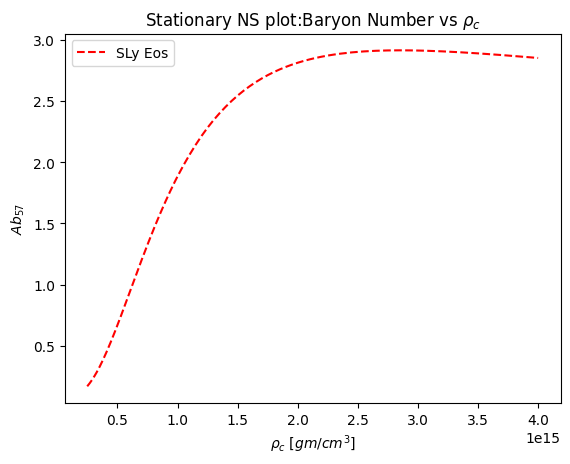

In [23]:
plt.figure()
ax=plt.gca()
ax.set_title(r"Stationary NS plot:Baryon Number vs $\rho_c$")
#ax.set_xlabel(r"$\rho_c$ [$MeV/fm^3$]")
ax.set_xlabel(r"$\rho_c$ [$gm/cm^3$]")
ax.set_ylabel(r"$Ab_{57}$")
#plt.plot(rho/(1.3234*(10**(-6))),Ab_s,"r--",label="SLy Eos")
plt.plot(rho/(7.4237*(10**(-19))),Ab_s,"r--",label="SLy Eos") #cgs unit
plt.legend(loc="best")
plt.show()

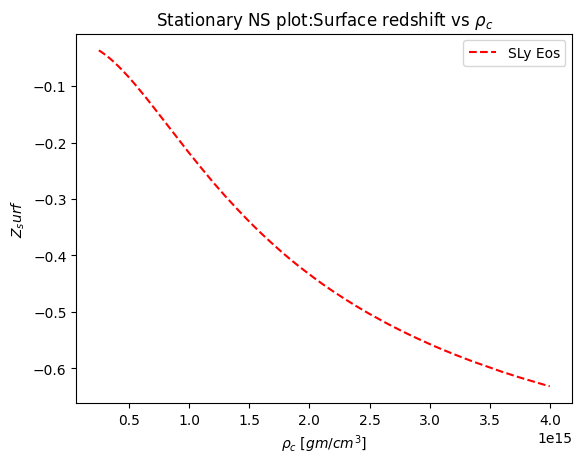

In [24]:
plt.figure()
ax=plt.gca()
ax.set_title(r"Stationary NS plot:Surface redshift vs $\rho_c$")
#ax.set_xlabel(r"$\rho_c$ [$MeV/fm^3$]")
ax.set_xlabel(r"$\rho_c$ [$gm/cm^3$]")
ax.set_ylabel(r"$Z_surf$")
#plt.plot(rho/(1.3234*(10**(-6))),Z_s,"r--",label="SLy Eos")
plt.plot(rho/(7.4237*(10**(-19))),Z_s,"r--",label="SLy Eos") #cgs unit
plt.legend(loc="best")
plt.show()

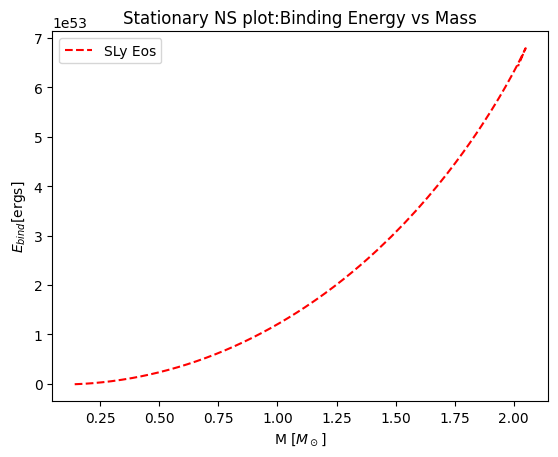

In [26]:
plt.figure()
ax=plt.gca()
ax.set_title(r"Stationary NS plot:Binding Energy vs Mass")
ax.set_xlabel(r"M [$M_\odot$]")
#ax.set_ylabel(r"$E_{bind}$[MeV]")
ax.set_ylabel(r"$E_{bind}$[ergs]")
#plt.plot(M_s,EFEbind_s/(1.3234*(10**(-60))),"r--",label="SLy Eos")
plt.plot(M_s,EFEbind_s/(8.2601*(10**(-55))),"r--",label="SLy Eos")
plt.legend(loc="best")
plt.show()

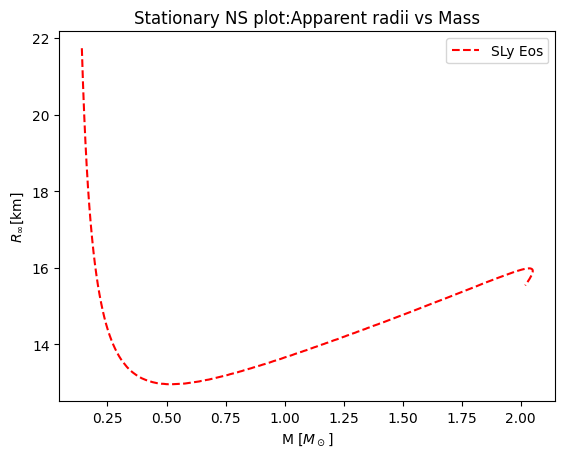

In [30]:
plt.figure()
ax=plt.gca()
ax.set_title(r"Stationary NS plot:Apparent radii vs Mass")
ax.set_xlabel(r"M [$M_\odot$]")
#ax.set_ylabel(r"$E_{bind}$[MeV]")
ax.set_ylabel(r"$R_∞$[km]")
#plt.plot(M_s,EFEbind_s/(1.3234*(10**(-60))),"r--",label="SLy Eos")
plt.plot(M_s,Ri_s,"r--",label="SLy Eos")
plt.legend(loc="best")
plt.show()